<a href="https://colab.research.google.com/github/arturodeleon19/Data-Science-Analysis-Projects/blob/main/Amazon%20Sales%202025/Amazon_Sales_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/amazon-sales-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-sales-2025


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/amazon-sales-2025/amazon_sales_data 2025.csv')
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [ ]:
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


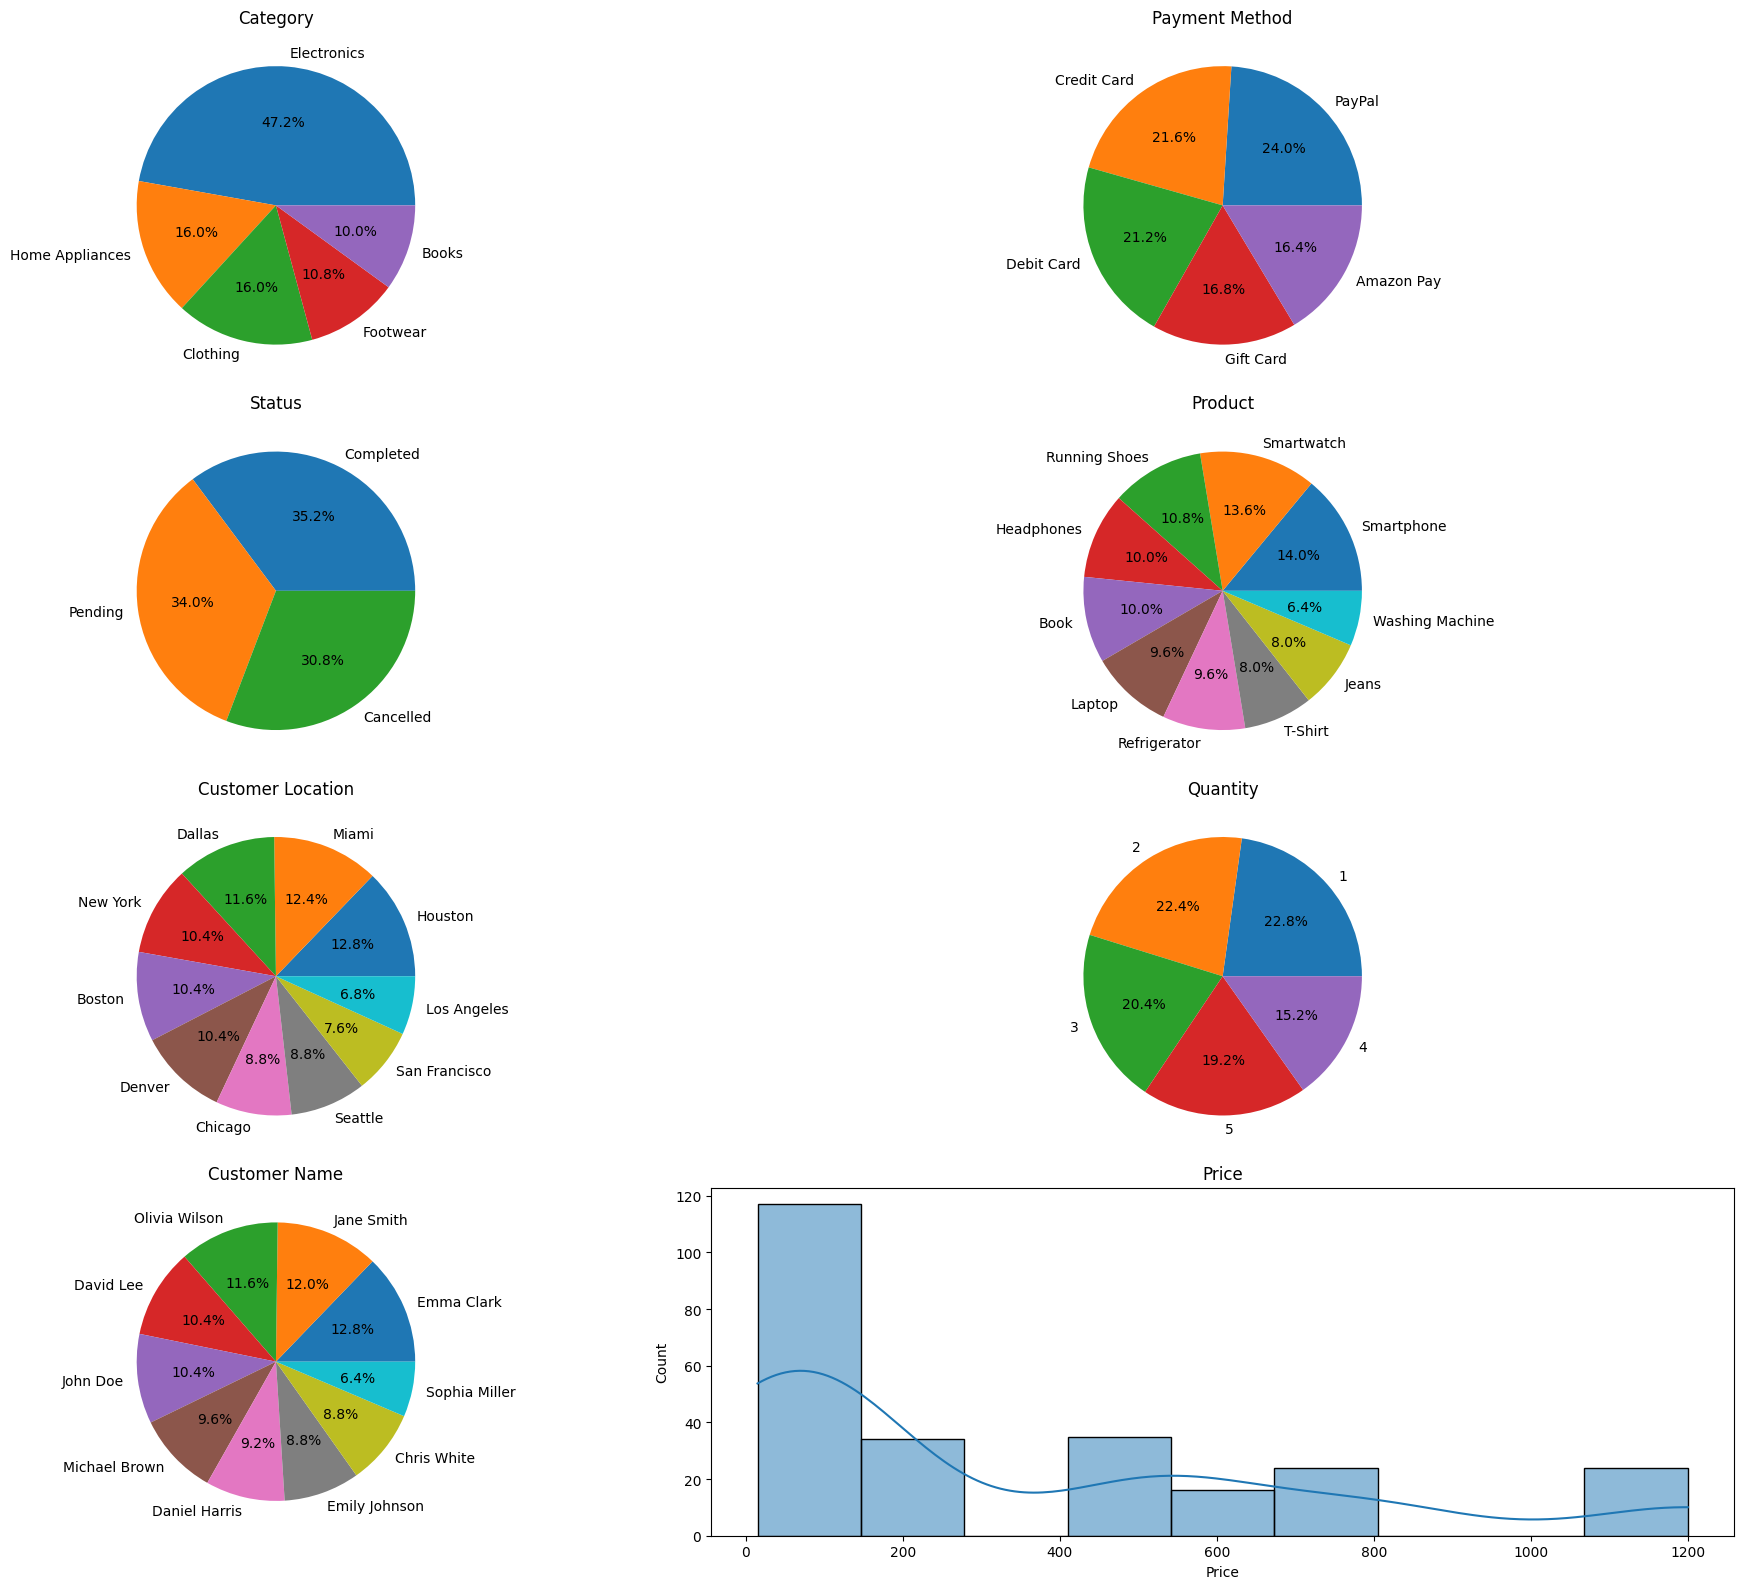

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20, 16))

category = df['Category'].value_counts()
axs[0,0].pie(category, labels=category.index, autopct='%1.1f%%')
axs[0,0].set_title('Category')

payment = df['Payment Method'].value_counts()
axs[0,1].pie(payment, labels=payment.index, autopct='%1.1f%%')
axs[0,1].set_title('Payment Method')

status = df['Status'].value_counts()
axs[1,0].pie(status, labels=status.index, autopct='%1.1f%%')
axs[1,0].set_title('Status')

product = df['Product'].value_counts()
axs[1,1].pie(product, labels=product.index, autopct='%1.1f%%')
axs[1,1].set_title('Product')

location = df['Customer Location'].value_counts()
axs[2,0].pie(location, labels=location.index, autopct='%1.1f%%')
axs[2,0].set_title('Customer Location')

customer = df['Customer Name'].value_counts()
axs[3,0].pie(customer, labels=customer.index, autopct='%1.1f%%')
axs[3,0].set_title('Customer Name')

quantity = df['Quantity'].value_counts()
axs[2,1].pie(quantity, labels=quantity.index, autopct='%1.1f%%')
axs[2,1].set_title('Quantity')

sns.histplot(df['Price'], ax=axs[3,1], kde=True)
axs[3,1].set_title('Price')


plt.tight_layout()
plt.show()

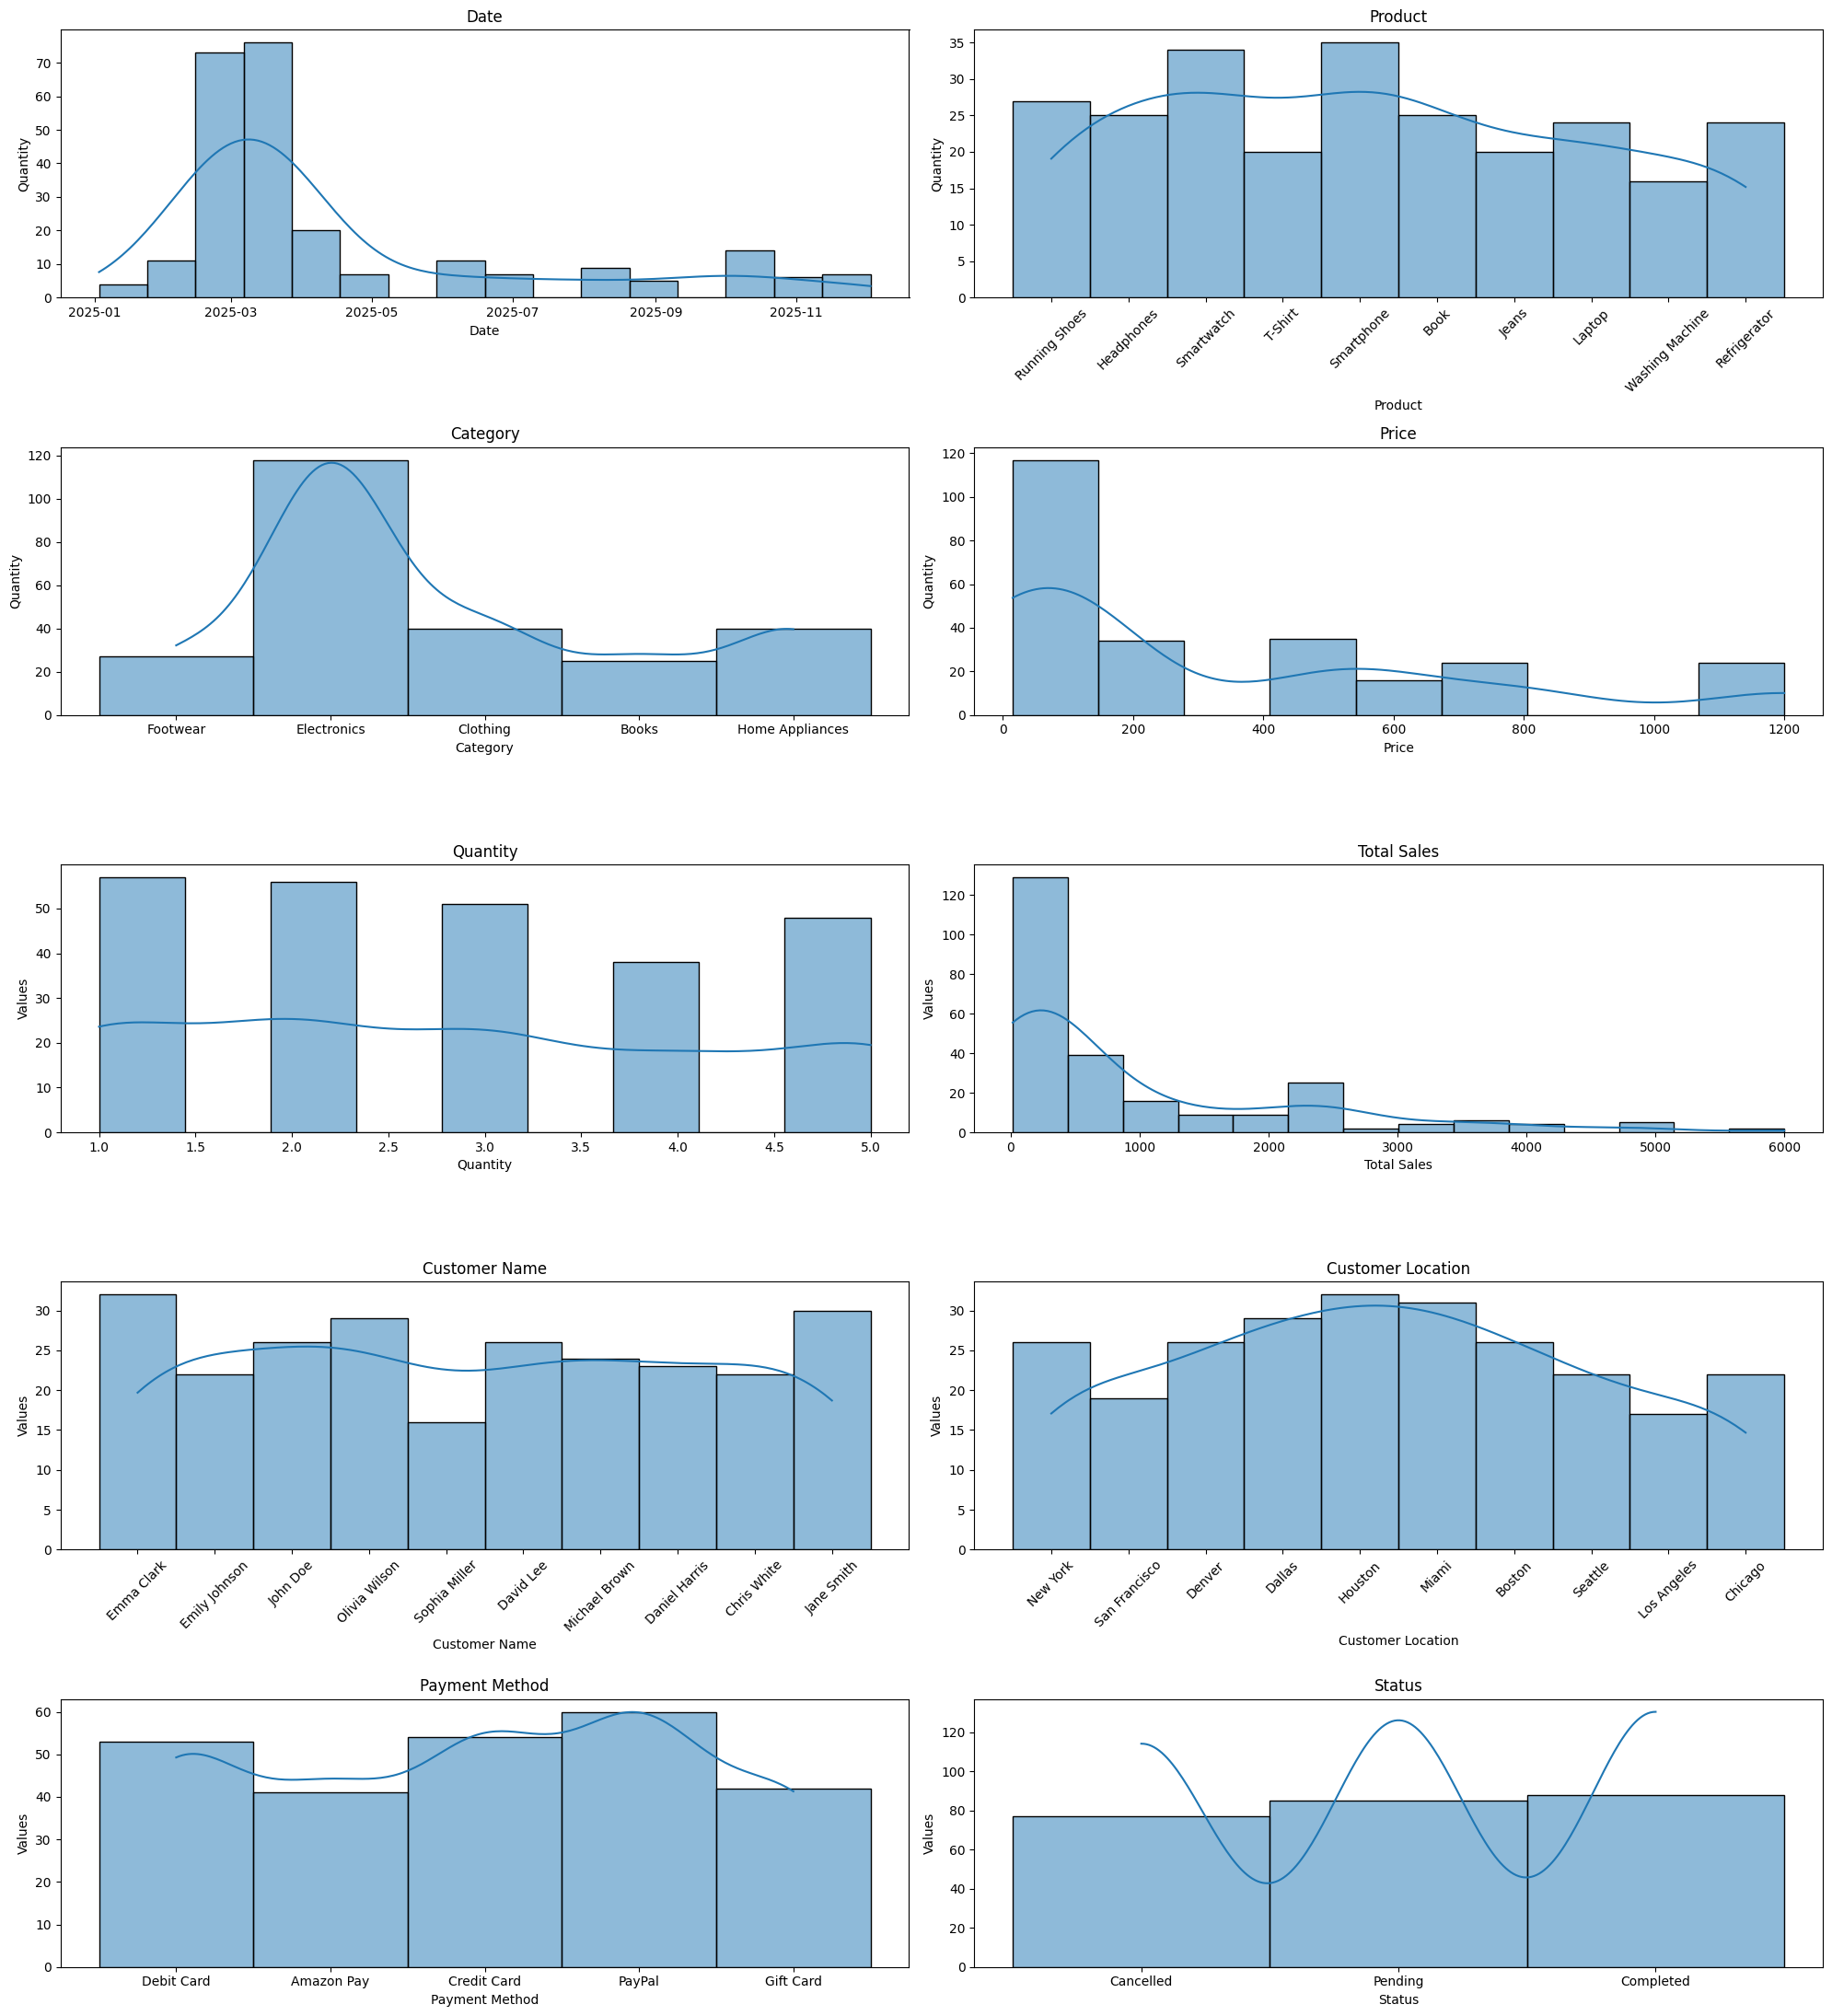

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 22))

df['Date'] = pd.to_datetime(df['Date'])

sns.histplot(df['Date'], ax=axs[0,0], kde=True)
axs[0,0].set_title('Date')
axs[0,0].set_xlabel('Date')
axs[0,0].set_ylabel('Quantity')

sns.histplot(df['Product'], ax=axs[0,1], kde=True)
axs[0,1].set_title('Product')
axs[0,1].set_xlabel('Product')
axs[0,1].set_ylabel('Quantity')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=45)

sns.histplot(df['Category'], ax=axs[1,0], kde=True)
axs[1,0].set_title('Category')
axs[1,0].set_xlabel('Category')
axs[1,0].set_ylabel('Quantity')

sns.histplot(df['Price'], ax=axs[1,1], kde=True)
axs[1,1].set_title('Price')
axs[1,1].set_xlabel('Price')
axs[1,1].set_ylabel('Quantity')

sns.histplot(df['Quantity'], ax=axs[2,0], kde=True)
axs[2,0].set_title('Quantity')
axs[2,0].set_xlabel('Quantity')
axs[2,0].set_ylabel('Values')

sns.histplot(df['Total Sales'], ax=axs[2,1], kde=True)
axs[2,1].set_title('Total Sales')
axs[2,1].set_xlabel('Total Sales')
axs[2,1].set_ylabel('Values')

sns.histplot(df['Customer Name'], ax=axs[3,0], kde=True)
axs[3,0].set_title('Customer Name')
axs[3,0].set_xlabel('Customer Name')
axs[3,0].set_ylabel('Values')
axs[3,0].set_xticklabels(axs[3,0].get_xticklabels(), rotation=45)

sns.histplot(df['Customer Location'], ax=axs[3,1], kde=True)
axs[3,1].set_title('Customer Location')
axs[3,1].set_xlabel('Customer Location')
axs[3,1].set_ylabel('Values')
axs[3,1].set_xticklabels(axs[3,1].get_xticklabels(), rotation=45)

sns.histplot(df['Payment Method'], ax=axs[4,0], kde=True)
axs[4,0].set_title('Payment Method')
axs[4,0].set_xlabel('Payment Method')
axs[4,0].set_ylabel('Values')

sns.histplot(df['Status'], ax=axs[4,1], kde=True)
axs[4,1].set_title('Status')
axs[4,1].set_xlabel('Status')
axs[4,1].set_ylabel('Values')

plt.tight_layout()
plt.show()

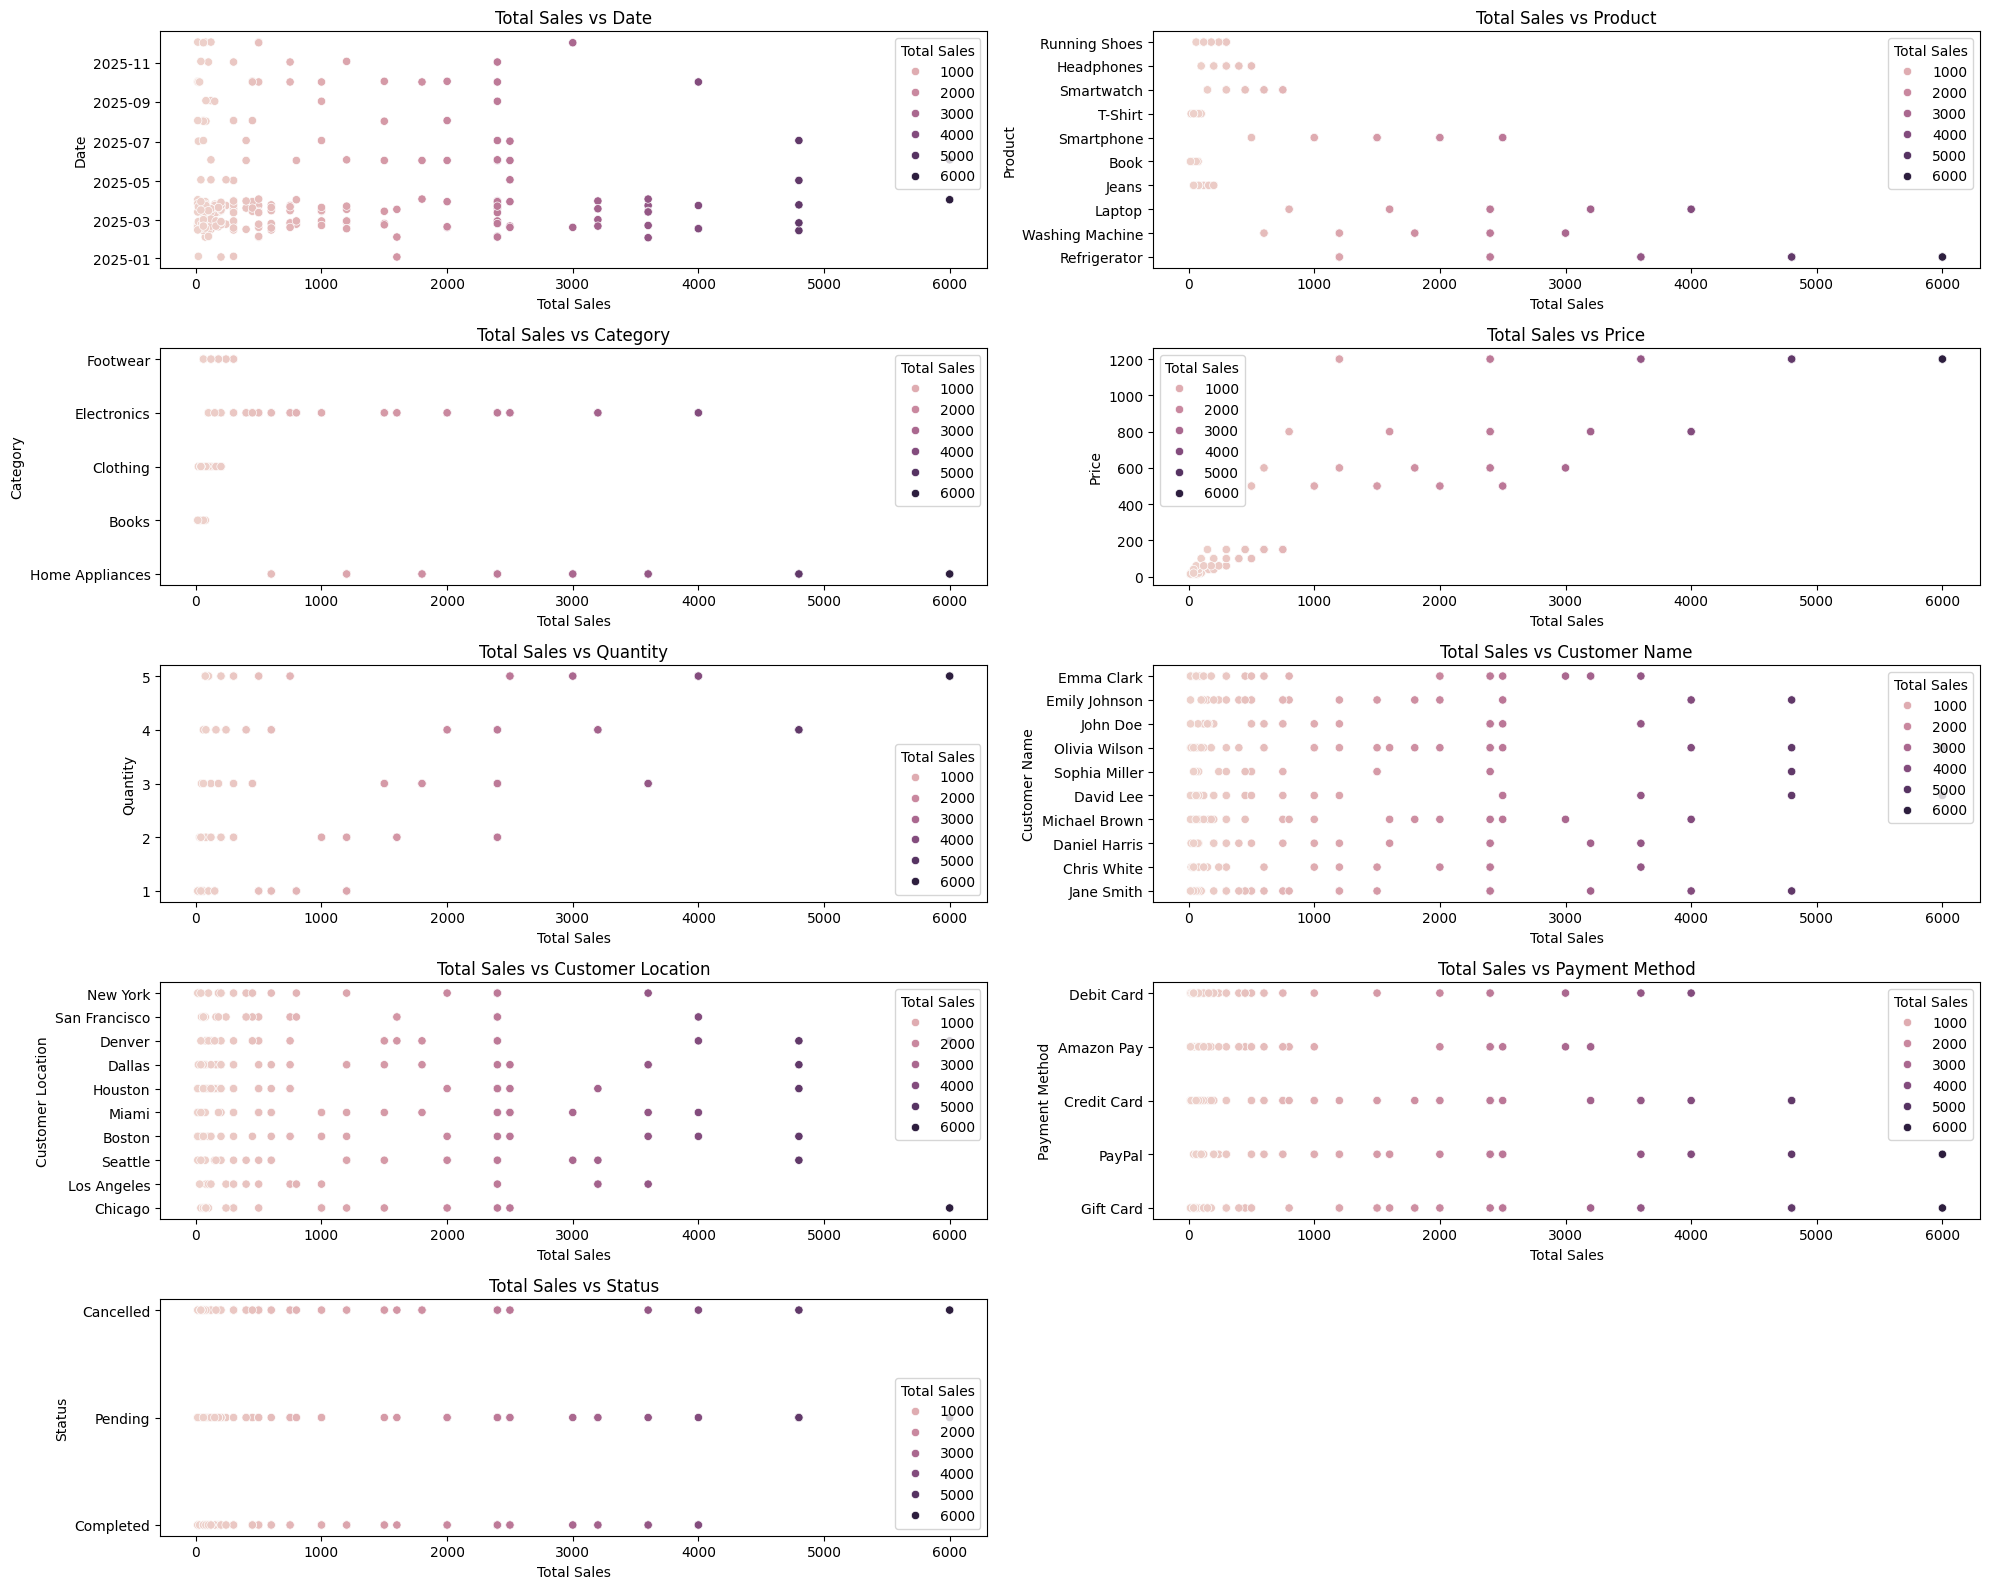

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 16))

sns.scatterplot(data=df, x='Total Sales', y='Date', ax=axs[0,0], hue='Total Sales')
axs[0,0].set_title('Total Sales vs Date')
axs[0,0].set_xlabel('Total Sales')
axs[0,0].set_ylabel('Date')

sns.scatterplot(data=df, x = 'Total Sales', y = 'Product', ax=axs[0,1], hue='Total Sales')
axs[0,1].set_title('Total Sales vs Product')
axs[0,1].set_xlabel('Total Sales')
axs[0,1].set_ylabel('Product')

sns.scatterplot(data=df, x='Total Sales', y='Category', ax=axs[1,0], hue='Total Sales')
axs[1,0].set_title('Total Sales vs Category')
axs[1,0].set_xlabel('Total Sales')

sns.scatterplot(data=df, x='Total Sales', y='Price', ax=axs[1,1], hue='Total Sales')
axs[1,1].set_title('Total Sales vs Price')
axs[1,1].set_xlabel('Total Sales')

sns.scatterplot(data=df, x='Total Sales', y='Quantity', ax=axs[2,0], hue='Total Sales')
axs[2,0].set_title('Total Sales vs Quantity')
axs[2,0].set_xlabel('Total Sales')

sns.scatterplot(data=df, x='Total Sales', y='Customer Name', ax=axs[2,1], hue='Total Sales')
axs[2,1].set_title('Total Sales vs Customer Name')
axs[2,1].set_xlabel('Total Sales')

sns.scatterplot(data=df, x='Total Sales', y='Customer Location', ax=axs[3,0], hue='Total Sales')
axs[3,0].set_title('Total Sales vs Customer Location')
axs[3,0].set_xlabel('Total Sales')

sns.scatterplot(data=df, x='Total Sales', y='Payment Method', ax=axs[3,1], hue='Total Sales')
axs[3,1].set_title('Total Sales vs Payment Method')
axs[3,1].set_xlabel('Total Sales')

sns.scatterplot(data=df, x='Total Sales', y='Status', ax=axs[4,0], hue='Total Sales')
axs[4,0].set_title('Total Sales vs Status')
axs[4,0].set_xlabel('Total Sales')

axs[4,1].remove()

plt.tight_layout()
plt.show()

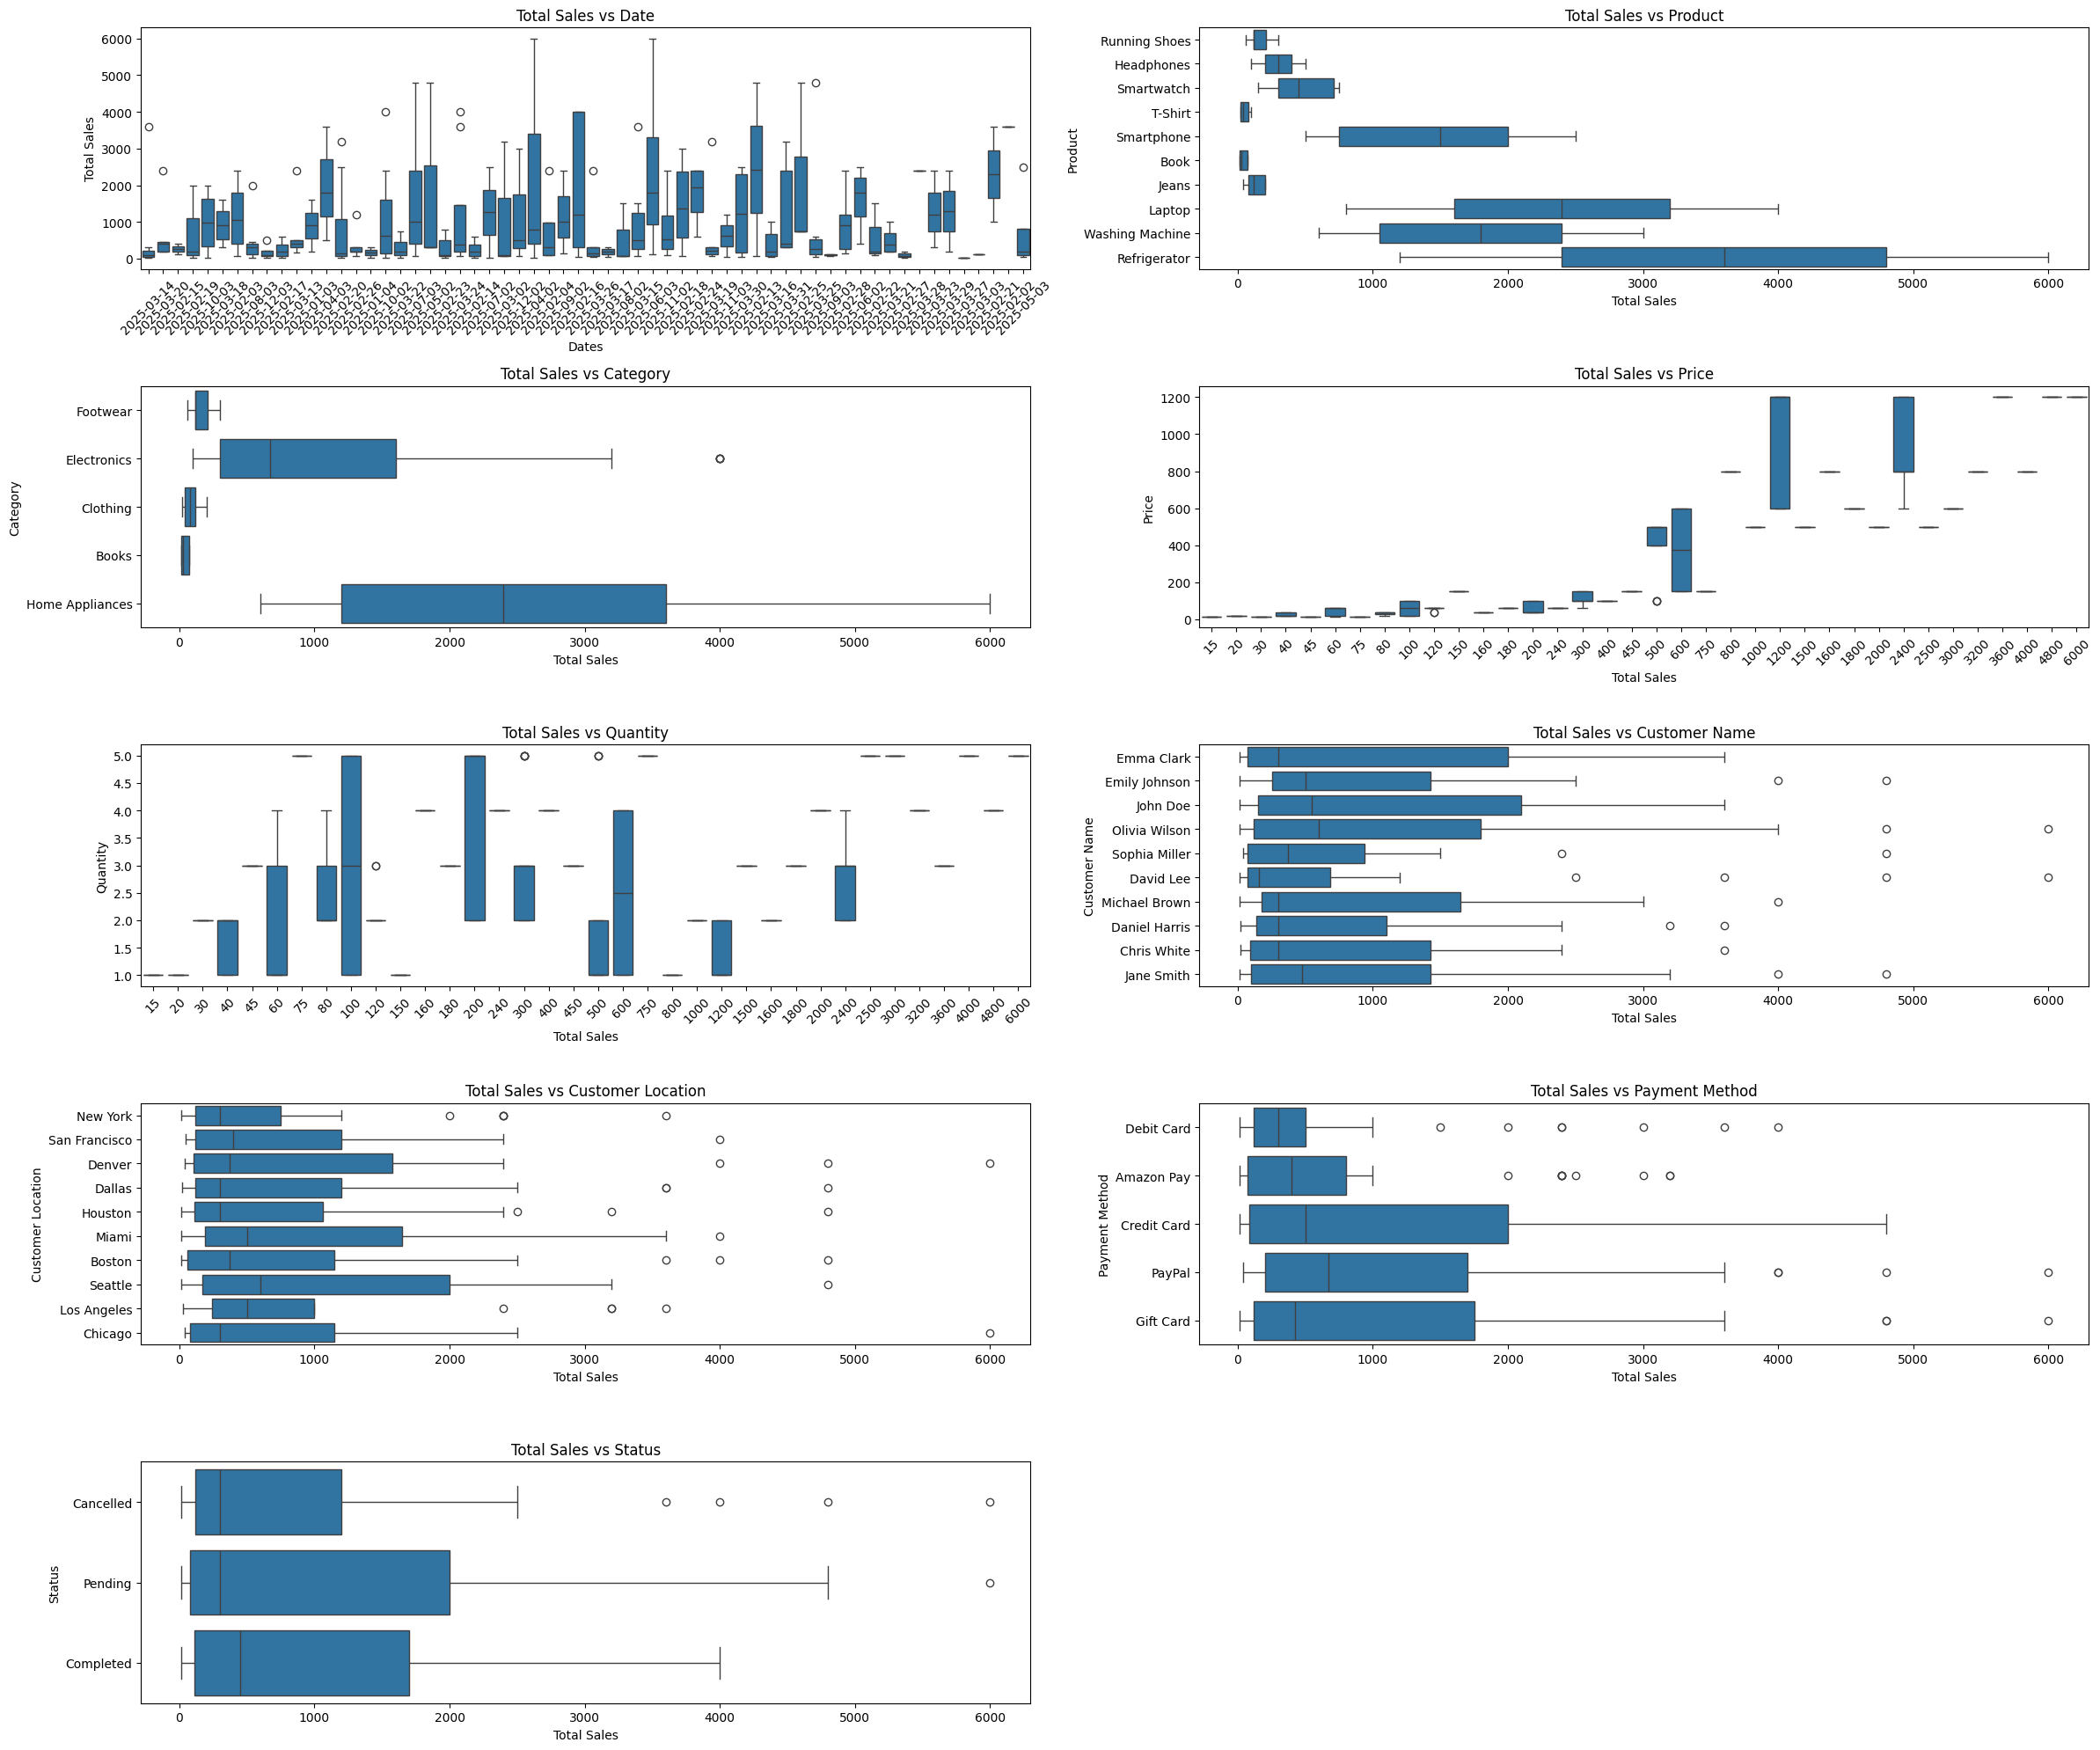

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(24, 20))

sns.boxplot(data=df, x='Date', y='Total Sales', ax=axs[0,0])
axs[0,0].set_title('Total Sales vs Date')
axs[0,0].set_xlabel('Dates')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=45)

sns.boxplot(data=df, x='Total Sales', y='Product', ax=axs[0,1])
axs[0,1].set_title('Total Sales vs Product')
axs[0,1].set_xlabel('Total Sales')

sns.boxplot(data=df, x='Total Sales', y='Category', ax=axs[1,0])
axs[1,0].set_title('Total Sales vs Category')
axs[1,0].set_xlabel('Total Sales')

sns.boxplot(data=df, x='Total Sales', y='Price', ax=axs[1,1])
axs[1,1].set_title('Total Sales vs Price')
axs[1,1].set_xlabel('Total Sales')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45)

sns.boxplot(data=df, x='Total Sales', y='Quantity', ax=axs[2,0])
axs[2,0].set_title('Total Sales vs Quantity')
axs[2,0].set_xlabel('Total Sales')
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation=45)

sns.boxplot(data=df, x='Total Sales', y='Customer Name', ax=axs[2,1])
axs[2,1].set_title('Total Sales vs Customer Name')
axs[2,1].set_xlabel('Total Sales')

sns.boxplot(data=df, x='Total Sales', y='Customer Location', ax=axs[3,0])
axs[3,0].set_title('Total Sales vs Customer Location')
axs[3,0].set_xlabel('Total Sales')

sns.boxplot(data=df, x='Total Sales', y='Payment Method', ax=axs[3,1])
axs[3,1].set_title('Total Sales vs Payment Method')
axs[3,1].set_xlabel('Total Sales')

sns.boxplot(data=df, x='Total Sales', y='Status', ax=axs[4,0])
axs[4,0].set_title('Total Sales vs Status')
axs[4,0].set_xlabel('Total Sales')

axs[4,1].remove()

plt.tight_layout()
plt.show()

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [ ]:
oe = OrdinalEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = oe.fit_transform(df[[col]])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           250 non-null    float64       
 1   Date               250 non-null    datetime64[ns]
 2   Product            250 non-null    float64       
 3   Category           250 non-null    float64       
 4   Price              250 non-null    int64         
 5   Quantity           250 non-null    int64         
 6   Total Sales        250 non-null    int64         
 7   Customer Name      250 non-null    float64       
 8   Customer Location  250 non-null    float64       
 9   Payment Method     250 non-null    float64       
 10  Status             250 non-null    float64       
 11  year               250 non-null    int32         
 12  month              250 non-null    int32         
 13  day                250 non-null    int32         
dtypes: datetim

In [ ]:
X = df.drop(['Total Sales', 'Date'], axis=1)
y = df['Total Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(200, 200)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_model = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_model)

Mean Squared Error: 295401.19215269585


In [ ]:
model_2 = lgb.LGBMRegressor()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
mse_model_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error:", mse_model_2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 11
[LightGBM] [Info] Start training from score 1042.550000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
model_3 = xgb.XGBRegressor()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
mse_model_3 = mean_squared_error(y_test, y_pred_3)
print("Mean Squared Error:", mse_model_3)

Mean Squared Error: 29861.669921875


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

metrics_model = evaluate_model(model, X_test, y_test)
metrics_model_2 = evaluate_model(model_2, X_test, y_test)
metrics_model_3 = evaluate_model(model_3, X_test, y_test)

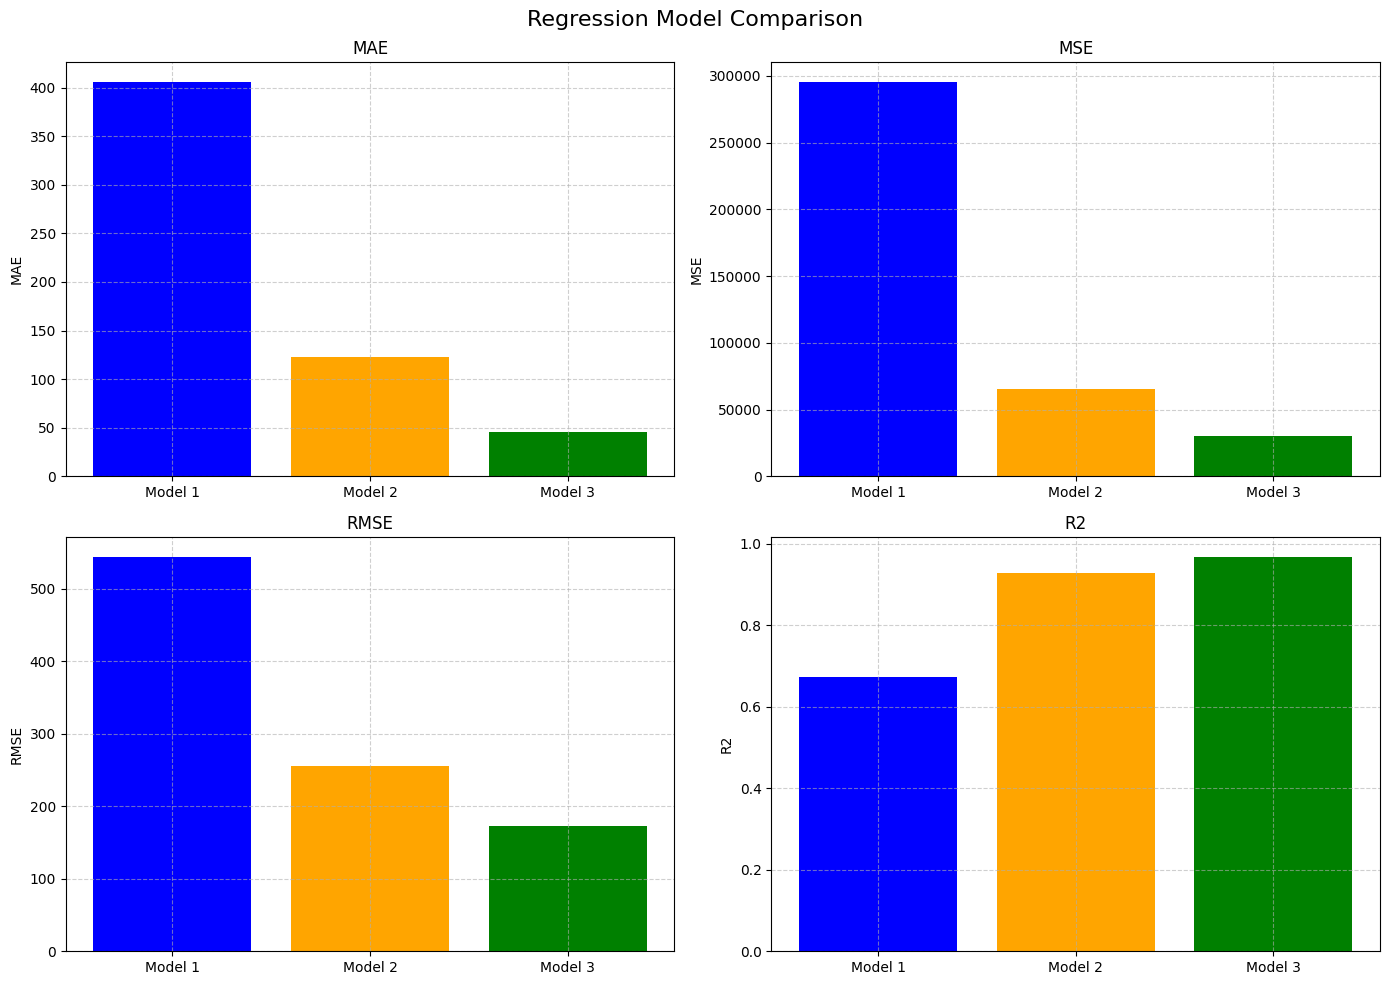

In [ ]:
metrics_names = ['MAE', 'MSE', 'RMSE', 'R2']
models = ['Model 1', 'Model 2', 'Model 3']
model_metrics = [metrics_model, metrics_model_2, metrics_model_3]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Regression Model Comparison', fontsize=16)


for i, metric in enumerate(metrics_names):
    ax = axes[i//2, i%2]
    values = [m[metric] for m in model_metrics]
    ax.bar(models, values, color=['blue', 'orange', 'green'])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

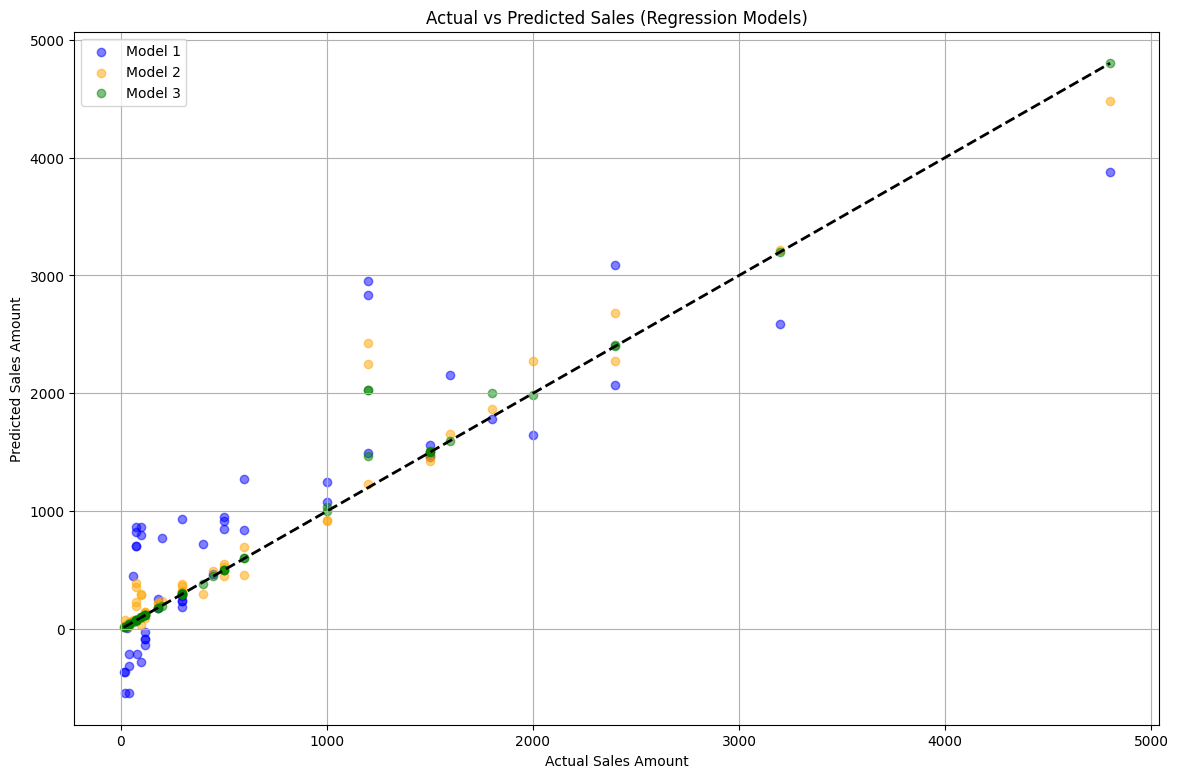

In [ ]:
plt.figure(figsize=(14, 9))

y_pred1 = model.predict(X_test)
y_pred2 = model_2.predict(X_test)
y_pred3 = model_3.predict(X_test)


plt.scatter(y_test, y_pred1, alpha=0.5, label='Model 1', color='blue')
plt.scatter(y_test, y_pred2, alpha=0.5, label='Model 2', color='orange')
plt.scatter(y_test, y_pred3, alpha=0.5, label='Model 3', color='green')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs Predicted Sales (Regression Models)')
plt.legend()
plt.grid(True)
plt.show()

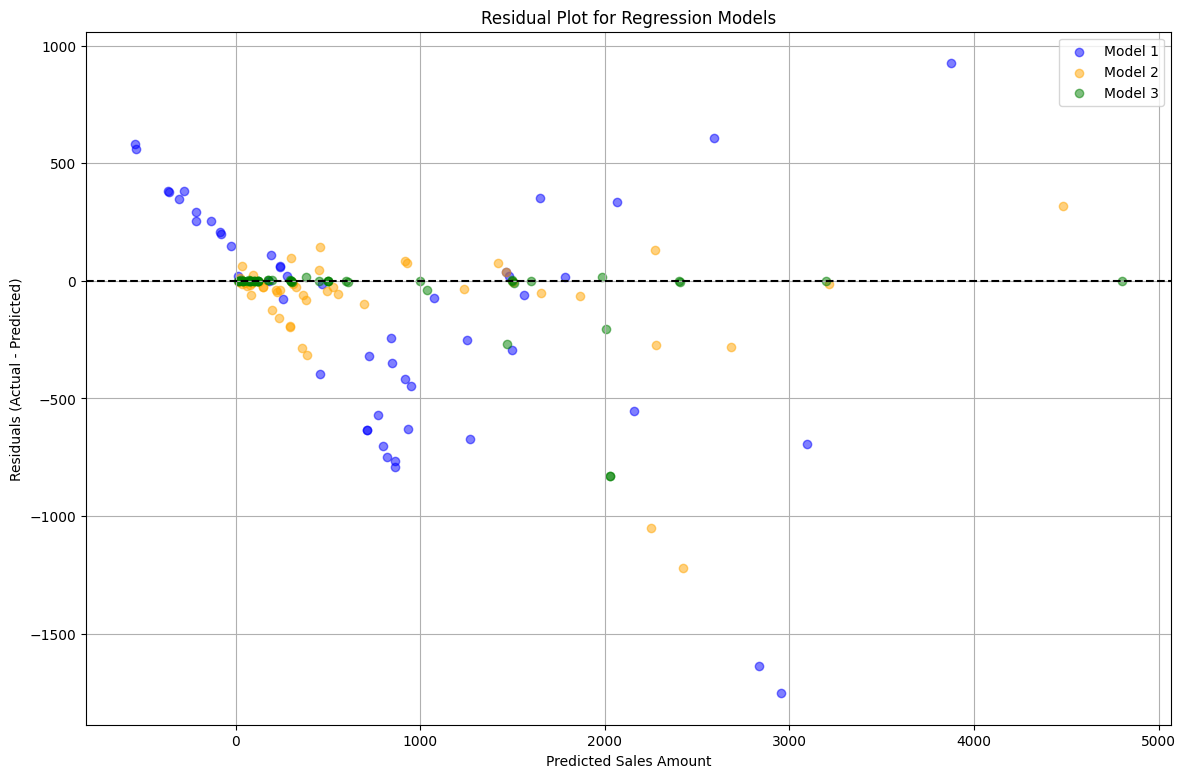

In [ ]:
plt.figure(figsize=(14, 9))

residuals1 = y_test - y_pred1
residuals2 = y_test - y_pred2
residuals3 = y_test - y_pred3

plt.scatter(y_pred1, residuals1, alpha=0.5, label='Model 1', color='blue')
plt.scatter(y_pred2, residuals2, alpha=0.5, label='Model 2', color='orange')
plt.scatter(y_pred3, residuals3, alpha=0.5, label='Model 3', color='green')

plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Sales Amount')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Regression Models')
plt.legend()
plt.grid(True)
plt.show()